# 0.1 Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib        import pyplot as plt
from statsmodels.stats import api    as sms

## 0.2 Load Data

In [3]:
df_raw = pd.read_csv('../data/raw/ab_testing.csv', low_memory=False)

df_raw.head()

,uid,country,gender,spent,purchases,date,group,device
0,11115722,MEX,F,1595,5,2016-03-08,GRP B,I
1,11122053,USA,M,498,2,2017-07-14,GRP B,I
2,11128688,USA,F,2394,6,2017-09-17,GRP A,I
3,11130578,USA,F,1197,3,2017-11-30,GRP A,I
4,11130759,ESP,M,1297,3,2018-01-10,GRP B,A


In [4]:
df_raw.shape

(45883, 8)

# 1.0 Test parameters

In [5]:
r = list(np.round(np.arange(0.14, 0.20, 0.001), 3))
sample_n_list = list()

# nivel de confiança
confidence_level = 0.95

# nivel de significancia
significance_level = 0.05

# conversoes da pagina atual e da nova pagina
p1 = 0.10
#p2 = 0.12

for p2 in r:
    # tamanho do efeito
    effect_size = sms.proportion_effectsize(p1, p2)

    # poder estatístico
    power = 0.80

    # sample size
    sample_n = sms.NormalIndPower().solve_power(effect_size=effect_size, power=power, alpha=significance_level)

    sample_n = np.round(sample_n).astype(int)
    sample_n_list.append(sample_n)

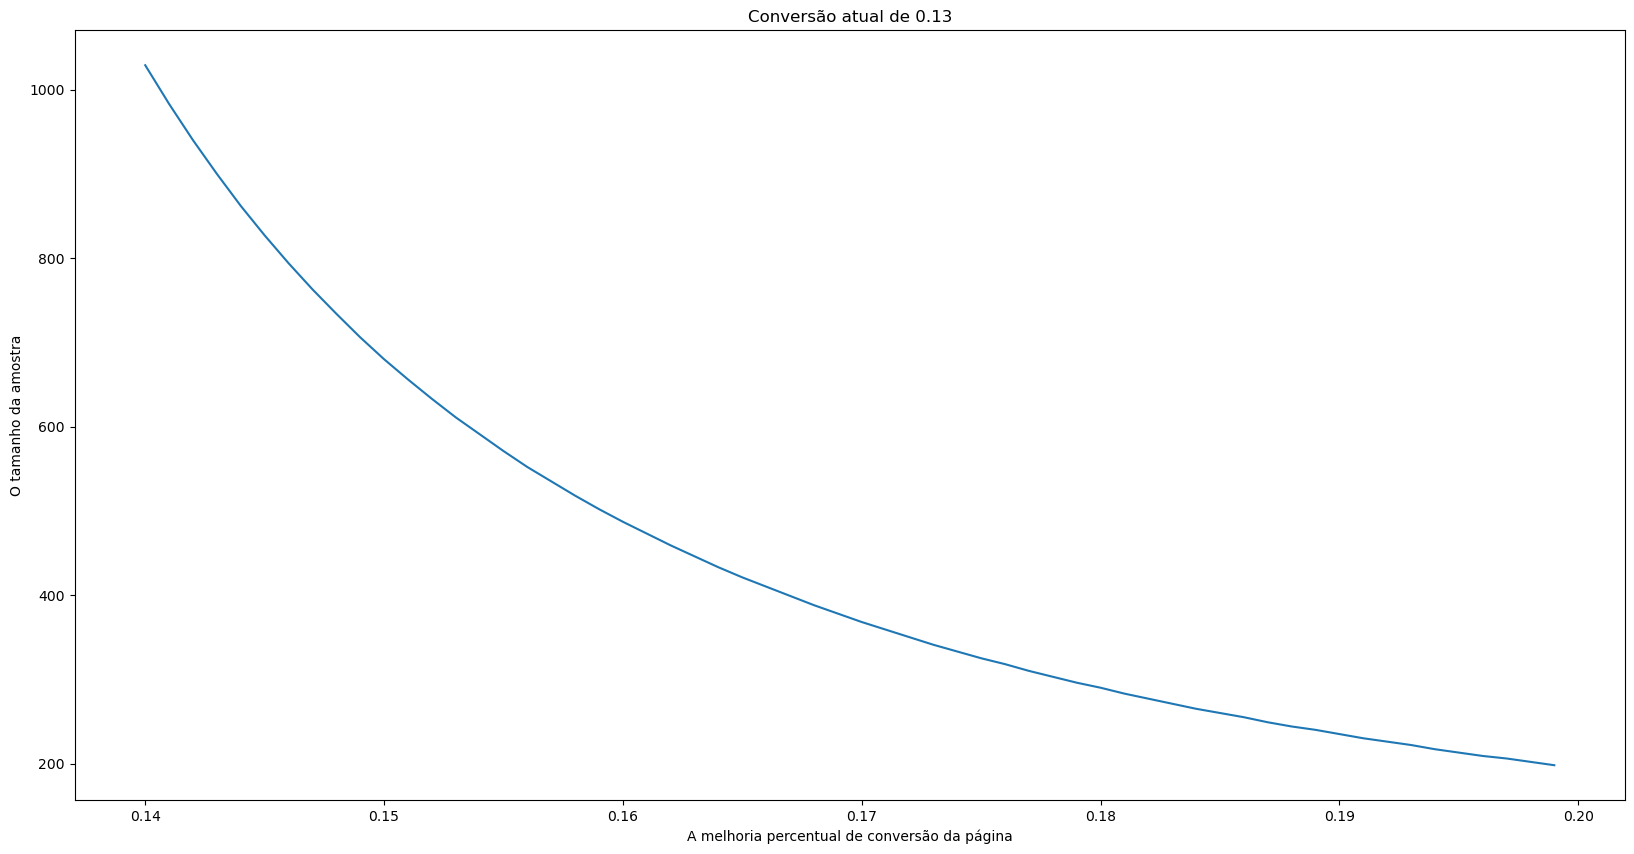

In [12]:
plt.figure(figsize=(20, 10))
plt.title('Conversão atual de 0.13')
plt.xlabel('A melhoria percentual de conversão da página')
plt.ylabel('O tamanho da amostra')
sns.lineplot(x=r, y=sample_n_list);

In [6]:
conversion_rate = 0.10
x = sample_n / conversion_rate

print(f'O numero total da base de email para enviar: {2*int(x)}')
print(f'O numero de email para enviar: {int(x)}')

O numero total da base de email para enviar: 3960
O numero de email para enviar: 1980


In [7]:
print(f'O tamanho total da amostra: {2*sample_n}')
print(f'O tamanho da amostra do grupo controle é de: {sample_n}')
print(f'O tamanho da amostra do grupo de tratamento é de: {sample_n}')

O tamanho total da amostra: 396
O tamanho da amostra do grupo controle é de: 198
O tamanho da amostra do grupo de tratamento é de: 198
